In [1]:
# Import dependencies
import os
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Extracted Hand Landmarks: [0.3977823555469513, 0.8969941139221191, 0.557512640953064, 0.783634603023529, 0.654640793800354, 0.6112182140350342, 0.7352741360664368, 0.4646226763725281, 0.816166341304779, 0.3584417402744293, 0.4646477699279785, 0.45751941204071045, 0.4762655794620514, 0.26468679308891296, 0.47533929347991943, 0.14737223088741302, 0.47231632471084595, 0.049102578312158585, 0.3534255027770996, 0.4805848002433777, 0.2752174735069275, 0.29002124071121216, 0.2318369746208191, 0.157350555062294, 0.18803834915161133, 0.04506336897611618, 0.27422603964805603, 0.5536180138587952, 0.22042261064052582, 0.487775593996048, 0.30373913049697876, 0.5982091426849365, 0.3627944588661194, 0.6704386472702026, 0.22019153833389282, 0.6549621224403381, 0.188877135515213, 0.622208297252655, 0.2706158459186554, 0.7049086689949036, 0.3326374292373657, 0.7581055760383606]
Length of landmark data: 42


I0000 00:00:1740626207.644384 19070577 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1740626207.651170 19071799 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740626207.657676 19071799 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740626207.673072 19071810 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


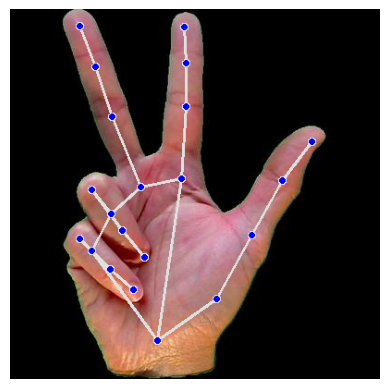

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

def extract_hand_landmarks(image_path):
    """Extracts hand landmarks from an image using MediaPipe and returns the data along with its length."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)
    
    if results.multi_hand_landmarks:
        landmarks = results.multi_hand_landmarks[0]
        data = []
        for landmark in landmarks.landmark:
            data.append(landmark.x)
            data.append(landmark.y)
        data_length = len(data)
        return data, data_length
    return None, 0

def display_image_with_landmarks(image_path):
    """Displays an image with hand landmarks drawn using MediaPipe and prints the length of landmark data."""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            landmarks_data = [(landmark.x, landmark.y) for landmark in hand_landmarks.landmark]
    
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Test example
image_path = '../Dataset/ASL_Main/3/hand1_3_bot_seg_4_cropped.jpeg'  # Replace with actual path
landmarks, length = extract_hand_landmarks(image_path)
if landmarks:
    print(f"Extracted Hand Landmarks: {landmarks}")
    print(f"Length of landmark data: {length}")
    display_image_with_landmarks(image_path)
else:
    print("No hand landmarks detected.")


Hand landmarks for the image: ([0.3977823555469513, 0.8969941139221191, 0.557512640953064, 0.783634603023529, 0.654640793800354, 0.6112182140350342, 0.7352741360664368, 0.4646226763725281, 0.816166341304779, 0.3584417402744293, 0.4646477699279785, 0.45751941204071045, 0.4762655794620514, 0.26468679308891296, 0.47533929347991943, 0.14737223088741302, 0.47231632471084595, 0.049102578312158585, 0.3534255027770996, 0.4805848002433777, 0.2752174735069275, 0.29002124071121216, 0.2318369746208191, 0.157350555062294, 0.18803834915161133, 0.04506336897611618, 0.27422603964805603, 0.5536180138587952, 0.22042261064052582, 0.487775593996048, 0.30373913049697876, 0.5982091426849365, 0.3627944588661194, 0.6704386472702026, 0.22019153833389282, 0.6549621224403381, 0.188877135515213, 0.622208297252655, 0.2706158459186554, 0.7049086689949036, 0.3326374292373657, 0.7581055760383606], 42)
Time taken to extract landmarks: 0.0215 seconds


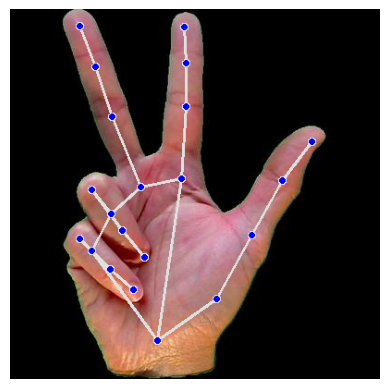

In [3]:
image_path = '../Dataset/ASL_Main/3/hand1_3_bot_seg_4_cropped.jpeg'  # Change to an actual path

start_time = time.time()
landmarks = extract_hand_landmarks(image_path)
end_time = time.time()

time_taken = end_time - start_time

if landmarks:
    print(f"Hand landmarks for the image: {landmarks}")
    print(f"Time taken to extract landmarks: {time_taken:.4f} seconds")
    display_image_with_landmarks(image_path)
else:
    print("No hand landmarks detected for the image.")
    print(f"Time taken to attempt extraction: {time_taken:.4f} seconds")



In [7]:
import os
import cv2
import time
import pandas as pd
import mediapipe as mp

# Logging and warning settings
import logging
os.environ['GLOG_minloglevel'] = '2'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('mediapipe').setLevel(logging.ERROR)

# Initialize MediaPipe Hands (for images, static_image_mode=True)
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7
)
mp_drawing = mp.solutions.drawing_utils

output_dir = '../Dataset/Generated_Data'
os.makedirs(output_dir, exist_ok=True)

def extract_hand_landmarks(image_path):
    """Extracts hand landmarks from an image using MediaPipe.
    If any landmarks are missing, it fills them with 0s."""
    
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return [0] * 42  # Return all zeros if image fails to load
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Initialize a list of 42 zeros (21 landmarks x, y)
    data = [0] * 42  

    if results.multi_hand_landmarks:
        landmarks = results.multi_hand_landmarks[0]
        
        for i, landmark in enumerate(landmarks.landmark):
            data[i * 2] = landmark.x   # X-coordinate
            data[i * 2 + 1] = landmark.y  # Y-coordinate
        
        return data

    print(f"Not enough landmarks detected in {image_path}. Filling with 0s.")
    return data  # Return the zero-filled list if no hand is detected


def preprocess_and_save_landmarks(
    asl_dir='../Dataset/ASL_Main',
    isl_dir='../Dataset/ISL',
    output_dir='../Dataset/Generated_Data'
):
    """Extracts hand landmarks for all images in ASL_Main subdirectories, as well as the
    first 100 images from ISL/space and ISL/del, and saves the results to a CSV."""
    data = []
    labels = []
    
    # Process all images from ASL_Main subdirectories
    for label in os.listdir(asl_dir):
        label_path = os.path.join(asl_dir, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                landmarks = extract_hand_landmarks(img_path)
                if landmarks:
                    data.append(landmarks)
                    labels.append(label)
    
    # Process first 100 images for 'space' and 'del' classes from ISL
    for special_label in ['space', 'del']:
        special_dir = os.path.join(isl_dir, special_label)
        if os.path.isdir(special_dir):
            # Sort filenames to have a consistent order and then pick first 100 images
            images = sorted(os.listdir(special_dir))[:100]
            for img_file in images:
                img_path = os.path.join(special_dir, img_file)
                landmarks = extract_hand_landmarks(img_path)
                if landmarks:
                    data.append(landmarks)
                    labels.append(special_label)
    
    # Build DataFrame; assume 21 landmarks x 2 = 42 features
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    columns = [f'x{i}' if i % 2 == 0 else f'y{i//2}' for i in range(42)]
    df = pd.DataFrame(data, columns=columns)
    df['label'] = labels
    
    output_csv_path = os.path.join(output_dir, f'asl_hand_landmark_{timestamp}.csv')
    df.to_csv(output_csv_path, index=False)
    print(f"Hand landmarks saved to: {output_csv_path}")

# Run the function to process images and save the landmarks to CSV
preprocess_and_save_landmarks()


I0000 00:00:1740626809.159026 19070577 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1740626809.166219 19090378 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740626809.170756 19090368 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Not enough landmarks detected in ../Dataset/ASL_Main/r/hand2_r_right_seg_1_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand1_r_dif_seg_5_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand5_r_dif_seg_5_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand5_r_dif_seg_4_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand2_r_left_seg_4_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand5_r_dif_seg_3_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand1_r_dif_seg_4_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand1_r_right_seg_4_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/hand1_r_right_seg_3_cropped.jpeg. Filling with 0s.
Not enough landmarks detected in ../Dataset/ASL_Main/r/ha

In [8]:
def count_labels_in_csv(csv_path):
    """Counts the number of entries for each label in the CSV."""
    df = pd.read_csv(csv_path)
    
    label_counts = df['label'].value_counts()
    
    print("Number of entries for each label:")
    print(label_counts)

# Usage example
csv_path = '../Dataset/Generated_Data/asl_hand_landmark_20250226_192734.csv'  # Replace with your actual path
count_labels_in_csv(csv_path)


Number of entries for each label:
label
del      100
space    100
b         70
d         70
v         70
q         70
4         70
x         70
3         70
e         70
k         70
u         70
l         70
2         70
y         70
5         70
p         70
w         70
c         70
r         70
m         70
h         70
9         70
0         70
7         70
i         70
n         70
g         70
6         70
z         70
1         70
8         70
s         70
a         70
f         70
o         70
j         70
t         65
Name: count, dtype: int64


In [ ]:
# Load the dataset
csv_path = '../Dataset/Generated_Data/asl_hand_landmark_20250226_192404.csv'  # Change to actual path
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Model Accuracy: 54.33%
              precision    recall  f1-score   support

           0       0.80      0.20      0.32        20
           1       1.00      0.70      0.82        10
           2       0.89      0.44      0.59        18
           3       1.00      0.92      0.96        12
           4       0.72      0.93      0.81        14
           5       1.00      0.69      0.81        16
           6       0.71      0.45      0.56        11
           7       0.92      0.85      0.88        13
           8       1.00      0.81      0.90        16
           9       1.00      1.00      1.00        15
           a       1.00      0.08      0.15        12
           b       1.00      0.93      0.96        14
           c       1.00      0.40      0.57        15
           d       1.00      0.85      0.92        13
         del       1.00      0.42      0.59        19
           e       1.00      0.15      0.27        13
           f       1.00      0.94      0.97        16
    

/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()